# Connecting and Uploading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Loading:

#loading Last Datasets:
import pandas as pd

#Dataset = pd.read_pickle("Dataset (Spoken and Written).pkl")
#display(Dataset.head(11))

Dataset_2 = pd.read_csv("Dataset_merged.csv")
display(Dataset_2.head(3))

print("\n")
print("================")
#Number of sample in each group:

num_samples = Dataset_2['Label'].value_counts()
for key,value in num_samples.items():
    print("{0: <8}".format(key), value)

print("\nSum = ", num_samples.sum())
print("================")

del key,value,num_samples

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree,longest_word_length
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,child {\n child {\n child {\n child {...,"['PRP', 'VBZ', 'RB', 'VBG', 'TO', 'VB', 'DT', ...",11,9,10
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,child {\n child {\n child {\n child {...,"['DT', 'JJ', 'NN', 'VBZ', 'VBN', 'JJS', 'NN', ...",16,12,9
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,child {\n child {\n child {\n child {...,"['VB', 'DT', 'NN', 'VBN', ',', 'IN', 'NN', ','...",14,13,9




Spoken   29509
Written  13632

Sum =  43141


In [13]:
Dataset_2.columns

Index(['Sentence', 'Label_num', 'Label', 'Length', 'Words', 'verb_count',
       'adverb_count', 'noun_count', 'coordinate_count', 'subordinate_count',
       'parstree', 'pos', 'longest_path_parstree', 'depth_parstree',
       'longest_word_length'],
      dtype='object')

In [15]:
Dataset_2['Label'].value_counts()

Label
Spoken     29509
Written    13632
Name: count, dtype: int64

In [16]:
# nomalization has been deleted. fix it.

# Creating Dataset

### Preprocessing

In [ ]:
# Downloading the Books and Removing the Gutenberg's Notes:
import requests
import re

URLs = ['https://www.gutenberg.org/cache/epub/13000/pg13000.txt',
        'https://www.gutenberg.org/cache/epub/35861/pg35861.txt',
        'https://www.gutenberg.org/cache/epub/64224/pg64224.txt'
        ]

# pg13000 => The Rough Riders (Theodore Roosevelt)
# pg35861 => A Study in American Politics (Woodrow Wilson)
# pg64224 => American problems (Theodore Roosevelt)

def download_file(url):
    # Downloading:
    response = requests.get(url)
    if response.status_code == 200:

        # Removing Gutenberg's Notes (Before "*** START" and After "*** END"):
        book = response.content.decode('utf-8')
        start_pattern = r"\*\*\* START OF (.*?) \*\*\*"
        end_pattern = "*** END OF"
        start_index = re.search(start_pattern, book).end()
        end_index = book.find(end_pattern)
        truncated_book = book[start_index+1:end_index]

        # Saving to the Current Directory:
        with open(url.split('/')[-1], 'wb') as f:
            f.write(truncated_book.encode())


for url in URLs:
  download_file(url)

del url, URLs

In [ ]:
#Downloading the Speeches:

import urllib.request, json
import pandas as pd

with urllib.request.urlopen('https://millercenter.org/sites/default/files/corpus/presidential-speeches.json') as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(data)

del url, data

In [ ]:
for i in df['president'].unique():
  print(i)

Warren G. Harding
Lyndon B. Johnson
John F. Kennedy
Benjamin Harrison
Franklin D. Roosevelt
Harry S. Truman
Richard M. Nixon
Dwight D. Eisenhower
Ronald Reagan
Andrew Johnson
Gerald Ford
Jimmy Carter
George H. W. Bush
Bill Clinton
George W. Bush
Barack Obama
George Washington
John Adams
Thomas Jefferson
Abraham Lincoln
James Madison
James Monroe
John Quincy Adams
Andrew Jackson
Martin Van Buren
William Harrison
John Tyler
James K. Polk
Zachary Taylor
Millard Fillmore
Franklin Pierce
James Buchanan
Ulysses S. Grant
Rutherford B. Hayes
James A. Garfield
Chester A. Arthur
Grover Cleveland
William McKinley
Theodore Roosevelt
William Taft
Woodrow Wilson
Calvin Coolidge
Herbert Hoover
Donald Trump
Joe Biden


In [ ]:
# Extracting the Speeches from Jason's Structure and Saving them as txt

speech = df['transcript'].str.cat(sep='. ')

with open('Speeches.txt', "w") as f:
    f.write(speech)

del df, speech

In [ ]:
# Reading the Data:

with open("pg13000.txt", "r", encoding='utf-8-sig') as f:
    Book_1 = f.read()

with open("pg35861.txt", "r", encoding='utf-8-sig') as f:
    Book_2 = f.read()

with open("pg64224.txt", "r", encoding='utf-8-sig') as f:
    Book_3 = f.read()

with open("Speeches.txt", "r", encoding='utf-8-sig') as f:
    Speech_1 = f.read()

del f

In [ ]:
# Removing the multi-space from the text. Also, the chapter titles have been removed manually:

data = {
         'Spoken':   [Speech_1],
         'Written':  [Book_1, Book_2, Book_3]
        }

for key in data.keys():
    for i in range(len(data[key])):
        data[key][i] = data[key][i].replace("\n", " ")
        data[key][i] = data[key][i].replace("    ", " ")
        data[key][i] = data[key][i].replace("   ", " ")
        data[key][i] = data[key][i].replace("  ", " ")

del Speech_1
del Book_1, Book_2, Book_3
del i, key

In [ ]:
#Saving the Dataset

import json

# create json object from dictionary
data_json = json.dumps(data)

# open file for writing, "w"
f = open("data(Spoken,Written).json","w")

# write json object to file
f.write(data_json)

# close file
f.close()

In [ ]:
# Sentence Extraction:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Splitting the text to sentences:

sentences =  {
              'Spoken':  [],
              'Written': []
             }

for key in data.keys():
    for i in range(len(data[key])):
        sentences[key].extend(nltk.sent_tokenize(data[key][i]))

del i, key, data

In [ ]:
# Number of Sentences before Truncation:

for key in sentences:
  print('{0: <7}'.format(key),' = ',len(sentences[key]))

del key

Spoken   =  165579
Written  =  5431


In [ ]:
# Creating dataframe with sentences and two additional columns, the length of the sentences (Number of characters), and the number of words in each sentence:

import pandas as pd

for key in sentences.keys():
    sentences_len = []
    sentences_words = []
    for sentence in sentences[key]:
        sentences_len.append(len(sentence))
        sentences_words.append(len(sentence.split()))

    dic = {"Sentence":sentences[key],"Length":sentences_len, "Words": sentences_words}
    exec(f'sentences_{key} = pd.DataFrame(dic)')

del key, dic, sentence, sentences, sentences_len, sentences_words

In [ ]:
# Extracted Spoken Sentences:

sentences_Spoken

,Sentence,Length,Words
0,"My countrymen, the surpassing war of all times...",133,23
1,The Republic must awaken.,25,4
2,The people must understand.,27,4
3,Our safety lies in full realization the fate o...,140,26
4,Primarily the American Republic has entered th...,86,14
...,...,...,...
165574,"""Such slippery slogans make more difficult the...",181,27
165575,"So doing, we must use language to enlighten th...",1120,191
165576,"241, 86th Cong., 2d sess.).",27,5
165577,The Address as reported from the floor appears...,99,17


In [ ]:
# Extracted Written Sentences:

sentences_Written

,Sentence,Length,Words
0,Produced by Dagny Wilson THE ROUGH RIDERS ...,368,63
1,"While my party was in opposition, I had preach...",199,36
2,"Now that my party had come to power, I felt it...",278,58
3,"Meanwhile, there was any amount of work at han...",104,20
4,"Naturally, when one is intensely interested in...",140,23
...,...,...,...
5426,Silently corrected typographical errors and va...,67,8
5427,2.,2,1
5428,"Archaic, non-standard, and uncertain spellings...",67,8
5429,3.,2,1


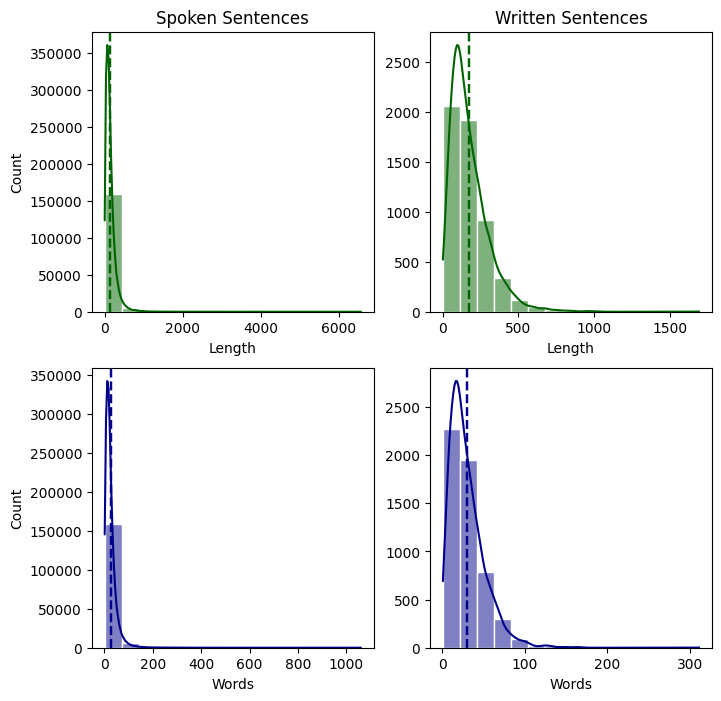

In [ ]:
# Histograms on all Sentences in the Dataset:

import statistics
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.set(style="darkgrid")


# First Row (Length):
sns.histplot(data=sentences_Spoken["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,0]).set(title='Spoken Sentences')
axs[0,0].axvline(x=statistics.mean(sentences_Spoken["Length"]), color='darkgreen', ls='--', lw=1.75)

sns.histplot(data=sentences_Written["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,1]).set(title='Written Sentences')
axs[0,1].axvline(x=statistics.mean(sentences_Written["Length"]), color='darkgreen', ls='--', lw=1.75)
axs[0,1].set_ylabel("")


# Second Row (Words):
sns.histplot(data=sentences_Spoken["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,0])
axs[1,0].axvline(x=statistics.mean(sentences_Spoken["Words"]), color='darkblue', ls='--', lw=1.75)

sns.histplot(data=sentences_Written["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,1])
axs[1,1].axvline(x=statistics.mean(sentences_Written["Words"]), color='darkblue', ls='--', lw=1.75)
axs[1,1].set_ylabel("")


plt.show()

In [ ]:
# Example of Shortest and Longest Spoken Sentences:
print("Spoken:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Spoken["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Spoken["Words"])), "--->  ",sentences_Spoken.iloc[sentences_Spoken["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Spoken["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Spoken["Words"])), "--->  ",sentences_Spoken.iloc[sentences_Spoken["Words"].idxmax()]["Sentence"])

# Example of Shortest and Longest Written Sentences:
print("\nWritten:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Written["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Written["Words"])), "--->  ",sentences_Written.iloc[sentences_Written["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Written["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Written["Words"])), "--->  ",sentences_Written.iloc[sentences_Written["Words"].idxmax()]["Sentence"])

Spoken:
Shortest Sentense:   index = 17      length = 1      --->   .
Longest Sentense:    index = 113233  length = 1060   --->   And whereas these resolutions, though not joint or concurrent in form, are substantially identical, and as such have hitherto been and yet are regarded as having expressed the sense of Congress upon the subject to which they relate; and Whereas the President of the United States, by proclamation of the 13th of June, 1865, declared that the insurrection in the State of Tennessee had been suppressed, and that the authority of the United States therein was undisputed, and that such United States officers as had been duly commissioned were in the undisturbed exercise of their official functions; and Whereas the President of the United States, by further proclamation, issued on the 2d day of April, 1866, did promulgate and declare that there no longer existed any armed resistance of misguided citizens or others to the authority of the United States in any or in a

In [ ]:
# Removing very long and very short sentenses:

sentences_Spoken_short  = sentences_Spoken  [(sentences_Spoken["Words"]  >2) & (sentences_Spoken["Words"]  <= 150)]
sentences_Written_short = sentences_Written [(sentences_Written["Words"] >2) & (sentences_Written["Words"] <= 150)]


In [ ]:
# Resetting the dataframe indexes:

sentences_Spoken_short  = sentences_Spoken_short.reset_index(drop=True)
sentences_Written_short = sentences_Written_short.reset_index(drop=True)

In [ ]:
del sentences_Spoken
del sentences_Written

### Histograms

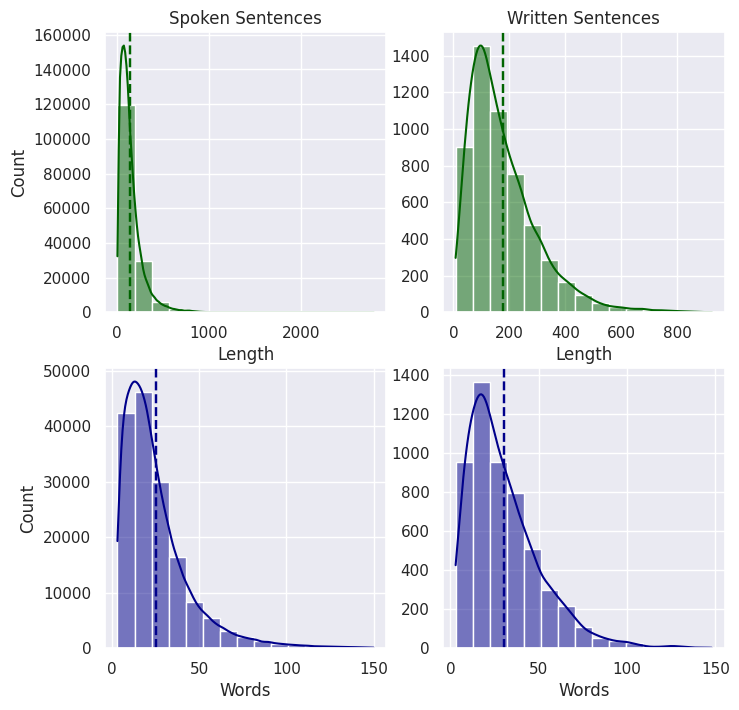

In [ ]:
# Histograms on all Truncated Sentences in the Dataset:

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.set(style="darkgrid")


# First Row (Length):
sns.histplot(data=sentences_Spoken_short["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,0]).set(title='Spoken Sentences')
axs[0,0].axvline(x=statistics.mean(sentences_Spoken_short["Length"]), color='darkgreen', ls='--', lw=1.75)

sns.histplot(data=sentences_Written_short["Length"], legend=False, color="darkgreen", kde=True, bins=15, ax = axs[0,1]).set(title='Written Sentences')
axs[0,1].axvline(x=statistics.mean(sentences_Written_short["Length"]), color='darkgreen', ls='--', lw=1.75)
axs[0,1].set_ylabel("")


# Second Row (Words):
sns.histplot(data=sentences_Spoken_short["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,0])
axs[1,0].axvline(x=statistics.mean(sentences_Spoken_short["Words"]), color='darkblue', ls='--', lw=1.75)

sns.histplot(data=sentences_Written_short["Words"], legend=False, color="darkblue", kde=True, bins=15, ax = axs[1,1])
axs[1,1].axvline(x=statistics.mean(sentences_Written_short["Words"]), color='darkblue', ls='--', lw=1.75)
axs[1,1].set_ylabel("")

plt.show()

In [ ]:
# Example of Shortest and Longest Spoken Sentences:
print("Spoken:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Spoken_short["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Spoken_short["Words"])), "--->  ",sentences_Spoken_short.iloc[sentences_Spoken_short["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Spoken_short["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Spoken_short["Words"])), "--->  ",sentences_Spoken_short.iloc[sentences_Spoken_short["Words"].idxmax()]["Sentence"])

# Example of Shortest and Longest Written Sentences:
print("\nWritten:")
print("Shortest Sentense:   index =", '{0: <6}'.format(sentences_Written_short["Words"].idxmin()), " length =", '{0: <6}'.format(min(sentences_Written_short["Words"])), "--->  ",sentences_Written_short.iloc[sentences_Written_short["Words"].idxmin()]["Sentence"])
print("Longest Sentense:    index =", '{0: <6}'.format(sentences_Written_short["Words"].idxmax()), " length =", '{0: <6}'.format(max(sentences_Written_short["Words"])), "--->  ",sentences_Written_short.iloc[sentences_Written_short["Words"].idxmax()]["Sentence"])

Spoken:
Shortest Sentense:   index = 597     length = 3      --->   Is that true?
Longest Sentense:    index = 68389   length = 150    --->   It will be worthy at the same time of their lust and provident care to make such further alterations in the laws as will more especially protect and foster the several branches of manufacture which have been recently instituted or extended by the laudable exertions of our citizens.Under the existing aspect of our affairs I have thought it not inconsistent with a just precaution to have the gunboats, with the exception of those at New Orleans, placed in a situation incurring no expense beyond that requisite for their preservation and conveniency for future service, and to have the crews of those at New Orleans reduced to the number required for their navigation and safety.I have thought also that our citizens detached in quotas of militia amounting to 100,000 under the act of March, 1808, might not improperly be relieved from the state in which th

In [ ]:
del axs, fig

### Dataset

In [ ]:
# Labeling the Sentences:

sentences_Spoken_short["Label"]       = "Spoken"
sentences_Spoken_short["Label_num"]   = 0

sentences_Written_short["Label"]      = "Written"
sentences_Written_short["Label_num"]  = 1

In [ ]:
# Merging All Three Dataframes:

#del Dataset

Dataset = pd.concat([sentences_Spoken_short, sentences_Written_short], ignore_index = True)
Dataset.reset_index(drop=True)

,Sentence,Length,Words,Label,Label_num
0,"My countrymen, the surpassing war of all times...",133,23,Spoken,0
1,The Republic must awaken.,25,4,Spoken,0
2,The people must understand.,27,4,Spoken,0
3,Our safety lies in full realization the fate o...,140,26,Spoken,0
4,Primarily the American Republic has entered th...,86,14,Spoken,0
...,...,...,...,...,...
162569,"Incidentally, this seems to me to be a first-c...",87,13,Written,1
162570,----------------------------------------------...,96,4,Written,1
162571,Silently corrected typographical errors and va...,67,8,Written,1
162572,"Archaic, non-standard, and uncertain spellings...",67,8,Written,1


In [ ]:
# Shuffleing the Dataset:

from sklearn.utils import shuffle

Dataset = shuffle(Dataset)
Dataset.reset_index(drop=True, inplace=True)

In [ ]:
Dataset

,Sentence,Length,Words,Label,Label_num
0,It's not going to cost the government money.,44,8,Spoken,0
1,This great fact is made most manifest by the c...,125,22,Spoken,0
2,"Take a student torn, for example, between purs...",90,15,Spoken,0
3,No politicalparty can long pursue advantage at...,160,25,Spoken,0
4,Any one who has borne the anxieties and burden...,343,53,Spoken,0
...,...,...,...,...,...
162569,A question has arisen in relation to the exerc...,133,22,Spoken,0
162570,"The work is a heavy one, but it is not beyond ...",195,37,Spoken,0
162571,"It will be faced, without misgiving or hesitan...",212,37,Spoken,0
162572,"The workman demands an adequate wage, sufficie...",141,26,Spoken,0


In [ ]:
Dataset['Label'].value_counts()

Spoken     157224
Written      5350
Name: Label, dtype: int64

In [ ]:
#Saving the Dataset

Dataset.to_pickle("Dataset (Spoken and Written).pkl")

In [ ]:
del sentences_Spoken_short
del sentences_Written_short

# Feature Extraction

In [ ]:
display(Dataset.head(5))

In [ ]:
# Counting Verbs, Adverbs, Nouns, Coordinate conjunctions, Subordinate conjunctions:

import nltk
import spacy

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def count_pos_tags(sentence):
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    verb_count   = sum(1 for word, tag in tags if tag.startswith('V'))                   # verb
    adverb_count = sum(1 for word, tag in tags if tag.startswith('RB'))                  # adverb
    noun_count   = sum(1 for word, tag in tags if tag.startswith('N'))                   # noun
    coord_count   = sum(1 for word, tag in tags if tag.startswith('IN'))                 # coordinate conjunctions
    subord_count   = sum(1 for word, tag in tags if tag.startswith('CC'))                # subordinate conjunctions

    time_count = 0
    cause_count = 0

    for token in tokens:
        if token in ["when", "after", "while", "before", "since", "until"]:              # time clauses
            time_count += 1
        if token in ["because", "since", "as", "due to", "for", "in that"]:              # cause clauses
            cause_count += 1

    sen = nlp(sentence)
    adjective_clauses_count = 0
    adverbial_clauses_count = 0
    noun_clause_count = 0
    relative_adverb_clause_count = 0

    for token in sen:
        if token.dep_ == "advcl":                                                        # adjective clauses
            adjective_clauses_count += 1
        elif token.dep_ == "relcl":                                                      # adverbial clauses
            adverbial_clauses_count += 1
        elif token.dep_ == "ccomp":                                                      # noun clauses
            noun_clause_count += 1
        elif token.dep_ == "advmod" and token.text.lower() in ["when", "where", "why"]:  # relative adverb clauses
            relative_adverb_clause_count += 1


    return verb_count, adverb_count, noun_count, coord_count, subord_count, time_count, cause_count, adjective_clauses_count, adverbial_clauses_count, noun_clause_count, relative_adverb_clause_count

In [ ]:
sen = "when i was walking to work, i saw a raccoon"

In [ ]:
s = count_pos_tags(sen)
print("verb_count:", s[0])
print("adverb_count:", s[1])
print("noun_count:", s[2])
print("coord_count:", s[3])
print("subord_count:", s[4])
print("time_count:", s[5])
print("cause_count:", s[6])
print("adjective_clauses_count:", s[7])
print("adverbial_clauses_count:", s[8])
print("noun_clause_count:", s[9])
print("relative_adverb_clause_count:", s[10])

verb_count: 5
adverb_count: 0
noun_count: 2
coord_count: 0
subord_count: 0
time_count: 1
cause_count: 0
adjective_clauses_count: 1
adverbial_clauses_count: 0
noun_clause_count: 0
relative_adverb_clause_count: 1


In [ ]:
    return , , , , , , cause_count, adjective_clauses_count, adverbial_clauses_count, noun_clause_count, relative_adverb_clause_count

In [ ]:
count_pos_tags(s)

(5, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1)

In [ ]:
Dataset['verb_count'], Dataset['adverb_count'], Dataset['noun_count'], Dataset['coordinate_count'], Dataset['subordinate_count'], Dataset['time_count'], Dataset['cause_count'], Dataset['adjective_clauses_count'], Dataset['adverbial_clauses_count'], Dataset['noun_clause_count'], Dataset['relative_adverb_clause_count'] = zip(*Dataset['Sentence'].apply(count_pos_tags))

In [ ]:
display(Dataset.head(5))

,Sentence,Length,Words,Label,Label_num,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,time_count,cause_count,adjective_clauses_count,adverbial_clauses_count,noun_clause_count,relative_adverb_clause_count
0,It's not going to cost the government money.,44,8,Spoken,0,3,1,2,0,0,0,0,0,0,0,0
1,This great fact is made most manifest by the c...,125,22,Spoken,0,3,1,6,4,0,1,0,1,0,0,1
2,"Take a student torn, for example, between purs...",90,15,Spoken,0,3,0,5,3,1,0,1,0,0,0,0
3,No politicalparty can long pursue advantage at...,160,25,Spoken,0,1,0,9,5,2,0,0,0,0,0,0
4,Any one who has borne the anxieties and burden...,343,53,Spoken,0,9,4,15,6,3,0,1,0,3,0,0


In [ ]:
#Saving the Dataset

Dataset.to_pickle("Dataset (Spoken and Written)_FE.pkl")

# Parsing

In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 52.2 MB/s eta 0:00:00


In [ ]:
import stanza

In [ ]:
rm -rf corenlp

In [ ]:
# Download the Stanford CoreNLP package with Stanza's installation command
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)

INFO:stanza:Installing CoreNLP package into ./corenlp


In [ ]:
# Set the CORENLP_HOME environment variable to point to the installation location
import os
os.environ["CORENLP_HOME"] = corenlp_dir

In [ ]:
!ls $CORENLP_HOME

build.xml				  LIBRARY-LICENSES
corenlp.sh				  LICENSE.txt
CoreNLP-to-HTML.xsl			  Makefile
ejml-core-0.39.jar			  patterns
ejml-core-0.39-sources.jar		  pom-java-11.xml
ejml-ddense-0.39.jar			  pom-java-17.xml
ejml-ddense-0.39-sources.jar		  pom.xml
ejml-simple-0.39.jar			  protobuf-java-3.19.6.jar
ejml-simple-0.39-sources.jar		  README.txt
input.txt				  RESOURCE-LICENSES
input.txt.out				  sample-project-pom.xml
input.txt.xml				  SemgrexDemo.java
istack-commons-runtime-3.0.7.jar	  ShiftReduceDemo.java
istack-commons-runtime-3.0.7-sources.jar  slf4j-api.jar
javax.activation-api-1.2.0.jar		  slf4j-simple.jar
javax.activation-api-1.2.0-sources.jar	  stanford-corenlp-4.5.5.jar
javax.json-api-1.0-sources.jar		  stanford-corenlp-4.5.5-javadoc.jar
javax.json.jar				  stanford-corenlp-4.5.5-models.jar
jaxb-api-2.4.0-b180830.0359.jar		  stanford-corenlp-4.5.5-sources.jar
jaxb-api-2.4.0-b180830.0359-sources.jar   StanfordCoreNlpDemo.java
jaxb-impl-2.4.0-b180830.0438.jar	  StanfordDependenci

In [ ]:
!export CORENLP_HOME=path_to_corenlp_dir

In [ ]:
# Import client module
from stanza.server import CoreNLPClient

In [ ]:
# Construct a CoreNLPClient with some basic annotators, a memory allocation of 4GB, and port number 9001
client = CoreNLPClient(
    timeout=70000,
    #annotators=['tokenize','ssplit', 'pos', 'lemma', 'ner'],
    annotators=['tokenize','ssplit','pos','lemma','ner', 'parse', 'depparse','coref'],
    memory='4G',
    endpoint='http://localhost:9001',
    be_quiet=True)
print(client)

INFO:stanza:Writing properties to tmp file: corenlp_server-ab20a8ab3f0a430c.props


In [ ]:
# Start the background server and wait for some time
# Note that in practice this is totally optional, as by default the server will be started when the first annotation is performed
client.start()
import time; time.sleep(10)

INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 70000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-ab20a8ab3f0a430c.props -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,coref -preload -outputFormat serialized


In [ ]:
# Print background processes and look for java
!ps -o pid,cmd | grep java

  28485 java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -time
  28572 /bin/bash -c ps -o pid,cmd | grep java
  28574 grep java


In [ ]:
# applying Stanford CoreNLP on all sentences in Dataset:

Dataset.head(2)

In [ ]:
# Annotate some text
text = "I am Mosab"
document = client.annotate(text)
print(type(document))

<class 'CoreNLP_pb2.Document'>


In [ ]:
print(text)
print([t.pos for t in document.sentence[0].token])
del text

i am mosab
['PRP', 'VBP', 'NNP']


In [ ]:
document.sentence[0].parseTree

child {
  child {
    child {
      child {
        value: "i"
      }
      value: "PRP"
      score: -5.879530906677246
    }
    value: "NP"
    score: -6.741097927093506
  }
  child {
    child {
      child {
        value: "am"
      }
      value: "VBP"
      score: -2.893768548965454
    }
    child {
      child {
        child {
          value: "mosab"
        }
        value: "NNP"
        score: -15.711504936218262
      }
      value: "NP"
      score: -19.05025291442871
    }
    value: "VP"
    score: -28.112964630126953
  }
  value: "S"
  score: -39.55272674560547
}
value: "ROOT"
score: -39.72410583496094

In [ ]:
document.sentence[0].parseTree

In [ ]:
def Stanford_CoreNLP(text):

    document = client.annotate(text)

    verb_count   = sum(1 for t in document.sentence[0].token if t.pos.startswith('V'))
    adverb_count = sum(1 for t in document.sentence[0].token if t.pos.startswith('RB'))
    noun_count   = sum(1 for t in document.sentence[0].token if t.pos.startswith('N'))
    coord_count  = sum(1 for t in document.sentence[0].token if t.pos.startswith('IN'))
    subord_count = sum(1 for t in document.sentence[0].token if t.pos.startswith('CC'))
    part_tree    = document.sentence[0].parseTree
    pos          = [t.pos for t in document.sentence[0].token]

    return verb_count, adverb_count, noun_count, coord_count, subord_count, part_tree, pos

In [ ]:
Dataset.head(2)

,Sentence,Length,Words,Label,Label_num,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,time_count,cause_count,adjective_clauses_count,adverbial_clauses_count,noun_clause_count,relative_adverb_clause_count
0,It's not going to cost the government money.,44,8,Spoken,0,3,1,2,0,0,0,0,0,0,0,0
1,This great fact is made most manifest by the c...,125,22,Spoken,0,3,1,6,4,0,1,0,1,0,0,1


In [ ]:
Dataset_2 = Dataset.loc[Dataset['Label_num'] == 1]

In [ ]:
len(Dataset_2)

5350

In [ ]:
Dataset_2 = Dataset_2[['Sentence','Label_num','Label','Length','Words']].reset_index(drop=True)

In [ ]:
Dataset_2

,Sentence,Label_num,Label,Length,Words
0,"In the same way, when we speak of the “square ...",1,Written,110,20
1,Has the President any very great authority in ...,1,Written,70,12
2,"No one, I take it for granted, is disposed to ...",1,Written,238,39
3,As we had barely enough food for our own men t...,1,Written,119,22
4,Those great improvements which have been made ...,1,Written,231,39
...,...,...,...,...,...
5345,Impeachment is aimed altogether above the head...,1,Written,70,10
5346,"I did not hear from her for some time, and the...",1,Written,85,17
5347,"But, though these Committees are so many and s...",1,Written,206,36
5348,If such decisions as these two indicated the C...,1,Written,219,35


In [ ]:
text_sentences = Dataset_2[['Sentence']]['Sentence'].tolist()

text_sentences_pared = []
index_of_error = []

for i in range(len(text_sentences)):
  try:
    if i % 1000 == 0:
        print(i)
    result = Stanford_CoreNLP(text_sentences[i])
    text_sentences_pared.append(result)
  except:
    index_of_error.append(i)
    text_sentences_pared.append(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


In [ ]:
len(text_sentences_pared)

15000

In [ ]:
index_of_error

[]

In [ ]:
Dataset_2 = Dataset_2.drop(index_of_error)

In [ ]:
Dataset_2

,Sentence,Label_num,Label,Length,Words
0,She has sought to agree with us quickly when d...,0,Spoken,86,14
1,"We’ve picked up, since my election, trillions ...",0,Spoken,66,11
2,"And yet, what is wrong with a major effort by ...",0,Spoken,152,29
3,"This provision of law, is the Missouri Comprom...",0,Spoken,50,8
4,The strategic arms limitation talks have been ...,0,Spoken,65,10
...,...,...,...,...,...
14995,Ever since the Civil War they have waited for ...,0,Spoken,117,21
14996,That Congress tried its level best to put the ...,0,Spoken,66,13
14997,"Thus, as we wish to be forgiven, let us forgiv...",0,Spoken,91,18
14998,"The claimants have preserved their evidence, w...",0,Spoken,140,24


In [ ]:
for index in index_of_error:
    text_sentences_pared.pop(index)

In [ ]:
len(text_sentences_pared)

15000

In [ ]:
Dataset_2['verb_count'] = [sub[0] for sub in text_sentences_pared]
Dataset_2['adverb_count'] = [sub[1] for sub in text_sentences_pared]
Dataset_2['noun_count'] = [sub[2] for sub in text_sentences_pared]
Dataset_2['coordinate_count'] = [sub[3] for sub in text_sentences_pared]
Dataset_2['subordinate_count'] = [sub[4] for sub in text_sentences_pared]
Dataset_2['parstree'] = [sub[5] for sub in text_sentences_pared]
Dataset_2['pos'] = [sub[6] for sub in text_sentences_pared]

In [ ]:
Dataset_2 = Dataset_2.reset_index(drop=True)

In [ ]:
Dataset_2.head(2)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos
0,She has sought to agree with us quickly when d...,0,Spoken,86,14,5,1,2,1,0,child {\n child {\n child {\n child {...,"[PRP, VBZ, VBN, TO, VB, IN, PRP, RB, WRB, NNS,..."
1,"We’ve picked up, since my election, trillions ...",0,Spoken,66,11,2,0,3,3,0,child {\n child {\n child {\n child {...,"[PRP, VBP, VBN, RP, ,, IN, PRP$, NN, ,, NNS, I..."


In [ ]:
pip install graphviz pydot

In [ ]:
import graphviz

In [ ]:
import re
from graphviz import Digraph

def build_tree(data):
    """
    Build a tree from the string representation.
    """
    # Split the data into lines
    lines = data.split('\n')

    # Create a root node
    tree = {"children": []}
    current_node = tree
    stack = []

    # Regex pattern to identify node attributes
    pattern = re.compile(r'(value|score): "?(.*?)"?\s*$')

    for line in lines:
        line = line.strip()
        if line.startswith("child {"):
            # Start a new child node
            new_node = {"children": []}
            if current_node is not None:
                current_node["children"].append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif line == "}":
            # End of the current node, pop from stack
            current_node = stack.pop()
        else:
            # Extract attributes
            match = pattern.search(line)
            if match:
                current_node[match.group(1)] = match.group(2)

    return tree["children"][0]

def visualize_tree(node, graph=None, parent_id=None):
    """
    Visualize the tree using Graphviz.
    """
    if graph is None:
        graph = Digraph(comment='Tree Visualization')

    # Create a unique node id
    node_id = str(id(node))

    # Create label for the node
    label = node.get("value", "")
    graph.node(node_id, label)

    # Link to the parent node
    if parent_id is not None:
        graph.edge(parent_id, node_id)

    # Recurse for children
    for child in node.get("children", []):
        visualize_tree(child, graph, node_id)

    return graph

# Building and visualizing the tree
data = str(document.sentence[0].parseTree)
#data = str(Dataset_2['parstree'][0])
tree = build_tree(data)
graph = visualize_tree(tree)

# Save and display the graph
graph_file = '/mnt/data/tree_visualization'
graph.render(graph_file, format='png', cleanup=True)
graph_file + '.png'

#print(Dataset_2['parstree'][0])
print(document.sentence[0].parseTree)

child {
  child {
    child {
      child {
        value: "I"
      }
      value: "PRP"
      score: -1.9594900608062744
    }
    value: "NP"
    score: -2.8210573196411133
  }
  child {
    child {
      child {
        value: "saw"
      }
      value: "VBD"
      score: -4.82786226272583
    }
    child {
      child {
        child {
          value: "few"
        }
        value: "JJ"
        score: -5.087431907653809
      }
      child {
        child {
          value: "people"
        }
        value: "NNS"
        score: -3.5527708530426025
      }
      value: "NP"
      score: -11.954168319702148
    }
    child {
      child {
        child {
          value: "in"
        }
        value: "IN"
        score: -1.6811728477478027
      }
      child {
        child {
          child {
            value: "the"
          }
          value: "DT"
          score: -0.5893322825431824
        }
        child {
          child {
            value: "program"
          }
         

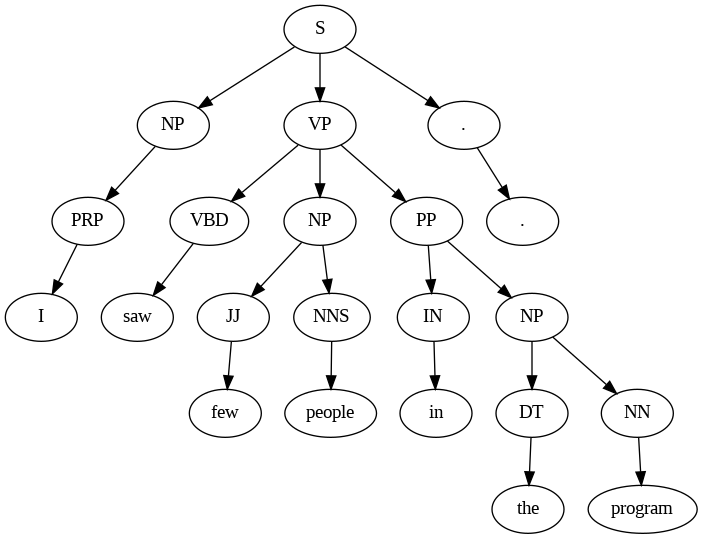

In [ ]:
from PIL import Image
image = Image.open('/mnt/data/tree_visualization.png')
display(image)

In [ ]:
def longest_path(node):
    """
    Calculate the longest path between two leaves in the tree.
    """
    if not node.get("children"):
        # Leaf node, no children
        return 0, 0

    max_depth = 0
    second_max_depth = 0
    max_path = 0

    for child in node["children"]:
        path, depth = longest_path(child)
        if depth > max_depth:
            second_max_depth = max_depth
            max_depth = depth
        elif depth > second_max_depth:
            second_max_depth = depth

        max_path = max(max_path, path)

    # Longest path through this node
    longest_through_root = max_depth + second_max_depth + 2

    return max(max_path, longest_through_root), max_depth + 1


def tree_depth(node):
    """
    Calculate the depth of the tree.
    """
    if not node.get("children"):
        # Leaf node, no children
        return 1

    return 1 + max(tree_depth(child) for child in node["children"])

## Calculating the longest path and depth of the tree
#longest_path_length, _ = longest_path(tree)
#depth = tree_depth(tree)

#print("longest_path_length:", longest_path_length)
#print("depth:", depth)

In [ ]:
def longest_path_and_depth(node):
    data = str(node)
    tree = build_tree(data)
    longest_path_length, _ = longest_path(tree)
    depth = tree_depth(tree)

    return longest_path_length, depth

In [ ]:
Dataset_2['longest_path_parstree'], Dataset_2['depth_parstree'] = zip(*Dataset_2['parstree'].apply(longest_path_and_depth))

In [ ]:
Dataset_2.head(2)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree
0,She has sought to agree with us quickly when d...,0,Spoken,86,14,5,1,2,1,0,child {\n child {\n child {\n child {...,"[PRP, VBZ, VBN, TO, VB, IN, PRP, RB, WRB, NNS,...",15,13
1,"We’ve picked up, since my election, trillions ...",0,Spoken,66,11,2,0,3,3,0,child {\n child {\n child {\n child {...,"[PRP, VBP, VBN, RP, ,, IN, PRP$, NN, ,, NNS, I...",12,10


In [ ]:
def longest_word_length(sentence):
    words = sentence.split()
    max_length = max(len(word) for word in words)
    return max_length

In [ ]:
Dataset_2['longest_word_length'] = Dataset_2['Sentence'].apply(longest_word_length)

In [ ]:
Dataset_2.head(2)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree,longest_word_length
0,She has sought to agree with us quickly when d...,0,Spoken,86,14,5,1,2,1,0,child {\n child {\n child {\n child {...,"[PRP, VBZ, VBN, TO, VB, IN, PRP, RB, WRB, NNS,...",15,13,11
1,"We’ve picked up, since my election, trillions ...",0,Spoken,66,11,2,0,3,3,0,child {\n child {\n child {\n child {...,"[PRP, VBP, VBN, RP, ,, IN, PRP$, NN, ,, NNS, I...",12,10,9


In [ ]:
print(Dataset_2.iloc[0]['Sentence'])
print(Dataset_2.iloc[0]['pos'])

She has sought to agree with us quickly when differences have disturbed our relations.
['PRP', 'VBZ', 'VBN', 'TO', 'VB', 'IN', 'PRP', 'RB', 'WRB', 'NNS', 'VBP', 'VBN', 'PRP$', 'NNS', '.']


In [ ]:
# Shut down the background CoreNLP server
client.stop()

time.sleep(10)
!ps -o pid,cmd | grep java

In [ ]:
# Merging Results:

In [ ]:
# Loading:

#loading Last Datasets:
import pandas as pd

Dataset_W = pd.read_csv("Dataset_2 (Spoken and Written)_FE(Written).csv")
display(Dataset_W.head(3))

print("\n")
print("================")
#Number of sample in each group:

num_samples = Dataset_W['Label'].value_counts()
for key,value in num_samples.items():
    print("{0: <8}".format(key), value)

print("\nSum = ", num_samples.sum())
print("================")

del key,value,num_samples

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree,longest_word_length
0,"In the same way, when we speak of the “square ...",1,Written,110,20,2,0,4,3,0,child {\n child {\n child {\n child {...,"['IN', 'DT', 'JJ', 'NN', ',', 'WRB', 'PRP', 'V...",14,8,13
1,Has the President any very great authority in ...,1,Written,70,12,1,1,4,2,0,child {\n child {\n child {\n child {...,"['VBZ', 'DT', 'NNP', 'DT', 'RB', 'JJ', 'NN', '...",12,8,9
2,"No one, I take it for granted, is disposed to ...",1,Written,238,39,7,1,10,7,1,child {\n child {\n child {\n child {...,"['DT', 'NN', ',', 'PRP', 'VBP', 'PRP', 'IN', '...",24,17,15




Written  5349

Sum =  5349


In [ ]:
# Loading:

#loading Last Datasets:
import pandas as pd

Dataset_0_15000 = pd.read_csv("Dataset_2 (Spoken and Written)_FE(0-15000).csv")
display(Dataset_0_15000.head(3))

print("\n")
print("================")
#Number of sample in each group:

num_samples = Dataset_0_15000['Label'].value_counts()
for key,value in num_samples.items():
    print("{0: <8}".format(key), value)

print("\nSum = ", num_samples.sum())
print("================")

del key,value,num_samples

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree,longest_word_length
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,child {\n child {\n child {\n child {...,"['PRP', 'VBZ', 'RB', 'VBG', 'TO', 'VB', 'DT', ...",11,9,10
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,child {\n child {\n child {\n child {...,"['DT', 'JJ', 'NN', 'VBZ', 'VBN', 'JJS', 'NN', ...",16,12,9
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,child {\n child {\n child {\n child {...,"['VB', 'DT', 'NN', 'VBN', ',', 'IN', 'NN', ','...",14,13,9




Spoken   14509
Written  491

Sum =  15000


In [ ]:
Dataset_0_15000 = Dataset_0_15000[Dataset_0_15000['Label'] != 'Written']

In [ ]:
Dataset_merged = pd.concat([Dataset_0_15000, Dataset_W], ignore_index=True)

In [ ]:
Dataset_merged

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree,longest_word_length
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,child {\n child {\n child {\n child {...,"['PRP', 'VBZ', 'RB', 'VBG', 'TO', 'VB', 'DT', ...",11,9,10
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,child {\n child {\n child {\n child {...,"['DT', 'JJ', 'NN', 'VBZ', 'VBN', 'JJS', 'NN', ...",16,12,9
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,child {\n child {\n child {\n child {...,"['VB', 'DT', 'NN', 'VBN', ',', 'IN', 'NN', ','...",14,13,9
3,No politicalparty can long pursue advantage at...,0,Spoken,160,25,1,1,9,5,2,child {\n child {\n child {\n child {...,"['DT', 'NN', 'MD', 'RB', 'VB', 'NN', 'IN', 'DT...",14,10,14
4,Any one who has borne the anxieties and burden...,0,Spoken,343,53,9,4,13,6,3,child {\n child {\n child {\n child {...,"['DT', 'NN', 'WP', 'VBZ', 'VBN', 'DT', 'NNS', ...",24,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19853,Impeachment is aimed altogether above the head...,1,Written,70,10,2,1,4,2,0,child {\n child {\n child {\n child {...,"['NN', 'VBZ', 'VBN', 'RB', 'IN', 'DT', 'NN', '...",11,9,11
19854,"I did not hear from her for some time, and the...",1,Written,85,17,4,2,3,3,1,child {\n child {\n child {\n child {...,"['PRP', 'VBD', 'RB', 'VB', 'IN', 'PRP', 'IN', ...",16,10,10
19855,"But, though these Committees are so many and s...",1,Written,206,36,6,4,6,7,2,child {\n child {\n child {\n value: ...,"['CC', ',', 'IN', 'DT', 'NNS', 'VBP', 'RB', 'J...",21,15,11
19856,If such decisions as these two indicated the C...,1,Written,219,35,4,1,8,6,1,child {\n child {\n child {\n child {...,"['IN', 'JJ', 'NNS', 'IN', 'DT', 'CD', 'VBD', '...",16,9,12


# Other Features

In [17]:
Dataset_2.head(2)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree,longest_word_length
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,child {\n child {\n child {\n child {...,"['PRP', 'VBZ', 'RB', 'VBG', 'TO', 'VB', 'DT', ...",11,9,10
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,child {\n child {\n child {\n child {...,"['DT', 'JJ', 'NN', 'VBZ', 'VBN', 'JJS', 'NN', ...",16,12,9


In [18]:
Dataset_2['verb_percent']        =  round(Dataset_2['verb_count']/Dataset_2['Words'], 2)
Dataset_2['adverb_percent']      =  round(Dataset_2['adverb_count']/Dataset_2['Words'], 2)
Dataset_2['noun_percent']        =  round(Dataset_2['noun_count']/Dataset_2['Words'], 2)
Dataset_2['coordinate_percent']  =  round(Dataset_2['coordinate_count']/Dataset_2['Words'], 2)
Dataset_2['subordinate_percent'] =  round(Dataset_2['subordinate_count']/Dataset_2['Words'], 2)

In [19]:
Dataset_2.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,parstree,pos,longest_path_parstree,depth_parstree,longest_word_length,verb_percent,adverb_percent,noun_percent,coordinate_percent,subordinate_percent
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,child {\n child {\n child {\n child {...,"['PRP', 'VBZ', 'RB', 'VBG', 'TO', 'VB', 'DT', ...",11,9,10,0.38,0.12,0.25,0.00,0.00
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,child {\n child {\n child {\n child {...,"['DT', 'JJ', 'NN', 'VBZ', 'VBN', 'JJS', 'NN', ...",16,12,9,0.14,0.00,0.32,0.18,0.00
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,child {\n child {\n child {\n child {...,"['VB', 'DT', 'NN', 'VBN', ',', 'IN', 'NN', ','...",14,13,9,0.20,0.00,0.33,0.20,0.07


In [20]:
def questions (node):
    S_question    = 1 if "value: \"SQ\""    in str(node) else 0
    S_question_wh = 1 if "value: \"SBARQ\"" in str(node) else 0
    return S_question, S_question_wh

In [21]:
Dataset_2['questions'], Dataset_2['questions_wh'] = zip(*Dataset_2['parstree'].apply(questions))

In [22]:
Dataset_2.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,longest_path_parstree,depth_parstree,longest_word_length,verb_percent,adverb_percent,noun_percent,coordinate_percent,subordinate_percent,questions,questions_wh
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,...,11,9,10,0.38,0.12,0.25,0.00,0.00,0,0
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,...,16,12,9,0.14,0.00,0.32,0.18,0.00,0,0
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,...,14,13,9,0.20,0.00,0.33,0.20,0.07,0,0


In [23]:
print(Dataset_2[Dataset_2['questions'] != 0]['Sentence'].iloc[1])

How do you feel about the job, and, if you can bear to tell us, how do you feel about us in the press?


In [24]:
def pronouns  (node):
    PRP_first  = node.lower().count("value: \"i\"") + node.lower().count("value: \"we\"")
    PRP_second = node.lower().count("value: \"you\"")
    PRP_third  = node.lower().count("value: \"he\"") + node.lower().count("value: \"she\"") + node.lower().count("value: \"it\"") + node.lower().count("value: \"they\"")

    return PRP_first, PRP_second, PRP_third

In [25]:
Dataset_2['PRP_first'], Dataset_2['PRP_second'], Dataset_2['PRP_third'] = zip(*Dataset_2['parstree'].apply(pronouns))

In [26]:
Dataset_2.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,verb_percent,adverb_percent,noun_percent,coordinate_percent,subordinate_percent,questions,questions_wh,PRP_first,PRP_second,PRP_third
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,...,0.38,0.12,0.25,0.00,0.00,0,0,0,0,1
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,...,0.14,0.00,0.32,0.18,0.00,0,0,0,0,0
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,...,0.20,0.00,0.33,0.20,0.07,0,0,0,0,0


In [27]:
Dataset_2['PRP_first_percent']   =  round(Dataset_2['PRP_first']/Dataset_2['Words'], 2)
Dataset_2['PRP_second_percent']  =  round(Dataset_2['PRP_second']/Dataset_2['Words'], 2)
Dataset_2['PRP_third_percent']   =  round(Dataset_2['PRP_third']/Dataset_2['Words'], 2)

In [28]:
Dataset_2.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,coordinate_percent,subordinate_percent,questions,questions_wh,PRP_first,PRP_second,PRP_third,PRP_first_percent,PRP_second_percent,PRP_third_percent
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,...,0.00,0.00,0,0,0,0,1,0.0,0.0,0.12
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,...,0.18,0.00,0,0,0,0,0,0.0,0.0,0.00
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,...,0.20,0.07,0,0,0,0,0,0.0,0.0,0.00


In [ ]:
## Annotate some text
#text = "from 10 to 15 monkeys"
#document = client.annotate(text)
#print(type(document))

In [ ]:
#questions(document.sentence[0].parseTree)

In [29]:
def phrases (node):
    S_noun       = node.count("value: \"NP\"")
    S_quantifier = node.count("value: \"QP\"")
    return S_noun, S_quantifier

In [30]:
Dataset_2['noun_phrase'], Dataset_2['quantifier_phrase'] = zip(*Dataset_2['parstree'].apply(phrases))

In [31]:
Dataset_2.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,questions,questions_wh,PRP_first,PRP_second,PRP_third,PRP_first_percent,PRP_second_percent,PRP_third_percent,noun_phrase,quantifier_phrase
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,...,0,0,0,0,1,0.0,0.0,0.12,2,0
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,...,0,0,0,0,0,0.0,0.0,0.00,10,0
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,...,0,0,0,0,0,0.0,0.0,0.00,6,0


In [32]:
Dataset_2.drop(columns=['quantifier_phrase'], inplace=True)

In [33]:
Dataset_2.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,subordinate_percent,questions,questions_wh,PRP_first,PRP_second,PRP_third,PRP_first_percent,PRP_second_percent,PRP_third_percent,noun_phrase
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,...,0.00,0,0,0,0,1,0.0,0.0,0.12,2
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,...,0.00,0,0,0,0,0,0.0,0.0,0.00,10
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,...,0.07,0,0,0,0,0,0.0,0.0,0.00,6


In [34]:
for column in Dataset_2.columns:
    print(column)

Sentence
Label_num
Label
Length
Words
verb_count
adverb_count
noun_count
coordinate_count
subordinate_count
parstree
pos
longest_path_parstree
depth_parstree
longest_word_length
verb_percent
adverb_percent
noun_percent
coordinate_percent
subordinate_percent
questions
questions_wh
PRP_first
PRP_second
PRP_third
PRP_first_percent
PRP_second_percent
PRP_third_percent
noun_phrase


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# load the dataset
dataset = pd.read_csv('pos_tag_tense_dataset/pos_tag_wise_tense_form_rules.csv')

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), token_pattern=None)
X = vectorizer.fit_transform(dataset['structure'])
y = dataset['tense']

# split data for traing and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

# define SVM model
svm_classifier = SVC(kernel='linear', random_state=41)
# fit the model using traning data
svm_classifier.fit(X_train, y_train)
# get predict result for test dataset
y_pred = svm_classifier.predict(X_test)
# get the accuracy of prediction result
accuracy = accuracy_score(y_test, y_pred)

print('Traing data : ', X_train.shape[0])
print('Test data : ', X_test.shape[0])
print("Accuracy:", accuracy)

Traing data :  3013
Test data :  754
Accuracy: 0.9217506631299734


In [ ]:
Dataset_2['Sentence'][0]

"It's not going to cost the government money."

In [ ]:
tagged = ['PRP,VBZ,RB,VBG,TO,VB,DT,NN,NN']

In [ ]:
vec = vectorizer.fit_transform(tagged)

In [ ]:
svm_classifier.predict(vec)

# Model Training

### Analyzing

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
Dataset = Dataset_2

In [38]:
Dataset = Dataset.sample(frac = 1).reset_index(drop=True)

In [39]:
Dataset.head(4)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,subordinate_percent,questions,questions_wh,PRP_first,PRP_second,PRP_third,PRP_first_percent,PRP_second_percent,PRP_third_percent,noun_phrase
0,"In the article, he said he had written me duri...",1,Written,92,18,5,0,4,2,1,...,0.06,0,0,0,0,2,0.0,0.0,0.11,6
1,This has not been an ancient history story.,0,Spoken,43,8,2,1,2,0,0,...,0.00,0,0,0,0,0,0.0,0.0,0.00,2
2,It receives at once sanction or rejection as a...,1,Written,195,36,7,1,8,6,4,...,0.11,0,0,0,0,2,0.0,0.0,0.06,13
3,And some anthropologists believe that the Indi...,1,Written,152,19,3,0,6,2,1,...,0.05,0,0,0,0,0,0.0,0.0,0.00,9


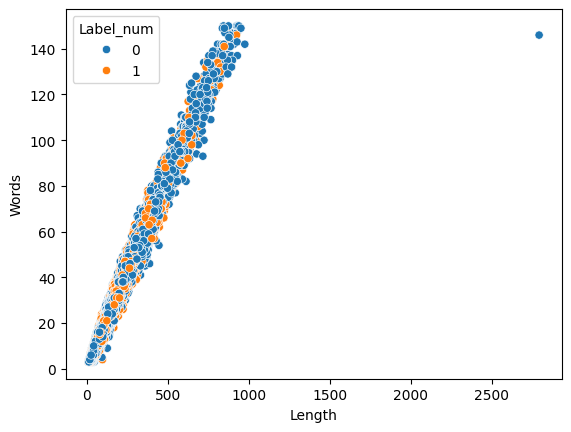

In [40]:
# Relation Between the Number of Characters and Words:

sns.scatterplot(data=Dataset, x="Length", y="Words", hue="Label_num")
plt.show()

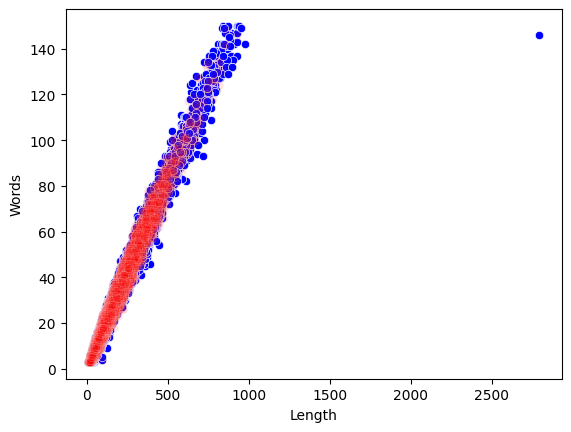

In [41]:
# Transparenting:

filtered_label_0 = Dataset[Dataset['Label_num'] == 0]
sns.scatterplot(data=filtered_label_0, x="Length", y="Words", alpha=1, color="blue")

filtered_label_1 = Dataset[Dataset['Label_num'] == 1]
sns.scatterplot(data=filtered_label_1, x="Length", y="Words", alpha=0.1, color="red")

plt.show()

### SVM

In [42]:
Dataset_2.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,subordinate_percent,questions,questions_wh,PRP_first,PRP_second,PRP_third,PRP_first_percent,PRP_second_percent,PRP_third_percent,noun_phrase
0,It's not going to cost the government money.,0,Spoken,44,8,3,1,2,0,0,...,0.00,0,0,0,0,1,0.0,0.0,0.12,2
1,This great fact is made most manifest by the c...,0,Spoken,125,22,3,0,7,4,0,...,0.00,0,0,0,0,0,0.0,0.0,0.00,10
2,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,...,0.07,0,0,0,0,0,0.0,0.0,0.00,6


In [43]:
Dataset_2['Label'].value_counts()

Label
Spoken     29509
Written    13632
Name: count, dtype: int64

In [44]:
Dataset_2['Label_num'].value_counts()

Label_num
0    29509
1    13632
Name: count, dtype: int64

In [45]:
label_0 = Dataset_2[Dataset_2['Label_num'] == 0]

In [46]:
label_0['Label_num'].value_counts()

Label_num
0    29509
Name: count, dtype: int64

In [47]:
label_0_to_drop = label_0.sample(n=15877)

In [48]:
Dataset_2_balanced = Dataset_2.drop(label_0_to_drop.index).reset_index(drop=True)

In [49]:
Dataset_2_balanced['Label_num'].value_counts()

Label_num
0    13632
1    13632
Name: count, dtype: int64

In [51]:
for column in Dataset_2.columns:
    print(column)

Sentence
Label_num
Label
Length
Words
verb_count
adverb_count
noun_count
coordinate_count
subordinate_count
parstree
pos
longest_path_parstree
depth_parstree
longest_word_length
verb_percent
adverb_percent
noun_percent
coordinate_percent
subordinate_percent
questions
questions_wh
PRP_first
PRP_second
PRP_third
PRP_first_percent
PRP_second_percent
PRP_third_percent
noun_phrase


In [52]:
Dataset = Dataset_2_balanced

In [53]:
Dataset['Label_num'].value_counts()

Label_num
0    13632
1    13632
Name: count, dtype: int64

In [58]:
import numpy as np

In [56]:
import pandas as pd

In [59]:
X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i], Dataset['Words'][i], Dataset['verb_count'][i], Dataset['adverb_count'][i], Dataset['noun_count'][i], Dataset['coordinate_count'][i], Dataset['subordinate_count'][i], Dataset['longest_path_parstree'][i], Dataset['depth_parstree'][i], Dataset['verb_percent'][i], Dataset['adverb_percent'][i], Dataset['noun_percent'][i], Dataset['coordinate_percent'][i],  Dataset['subordinate_percent'][i], Dataset['questions'][i], Dataset['questions_wh'][i], Dataset['PRP_first'][i], Dataset['PRP_second'][i], Dataset['PRP_third'][i], Dataset['PRP_first_percent'][i], Dataset['PRP_second_percent'][i], Dataset['PRP_third_percent'][i], Dataset['noun_phrase'][i]])

del i

X = np.array(X)
X


array([[9.00e+01, 1.50e+01, 3.00e+00, ..., 0.00e+00, 0.00e+00, 6.00e+00],
       [1.60e+02, 2.50e+01, 1.00e+00, ..., 0.00e+00, 0.00e+00, 1.10e+01],
       [3.43e+02, 5.30e+01, 9.00e+00, ..., 0.00e+00, 4.00e-02, 1.80e+01],
       ...,
       [1.51e+02, 2.50e+01, 3.00e+00, ..., 0.00e+00, 4.00e-02, 1.20e+01],
       [2.50e+02, 4.40e+01, 5.00e+00, ..., 0.00e+00, 0.00e+00, 1.60e+01],
       [4.90e+01, 7.00e+00, 2.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00]])

In [60]:
y = np.array(Dataset['Label_num'])
y

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [62]:
# Using np.bincount to count occurrences of 0 and 1
counts = np.bincount(y)

# The counts array will have the count of 0s at index 0 and the count of 1s at index 1
count_zeros = counts[0]
count_ones = counts[1]

print("Number of 0s:", count_zeros)
print("Number of 1s:", count_ones)

Number of 0s: 13632
Number of 1s: 13632


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [65]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5358518246836603
Confusion Matrix:
 [[ 665 2062]
 [ 469 2257]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.24      0.34      2727
           1       0.52      0.83      0.64      2726

    accuracy                           0.54      5453
   macro avg       0.55      0.54      0.49      5453
weighted avg       0.55      0.54      0.49      5453



In [ ]:
#pip install joblib

In [ ]:
# Saving Model:

from joblib import dump, load

dump(svm, 'svm_model.joblib')

['svm_model.joblib']

In [ ]:
# Loading Model:

svm = load('svm_model.joblib')

### Decision Tree

In [67]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [68]:
for column in Dataset.columns:
    print(column)

Sentence
Label_num
Label
Length
Words
verb_count
adverb_count
noun_count
coordinate_count
subordinate_count
parstree
pos
longest_path_parstree
depth_parstree
longest_word_length
verb_percent
adverb_percent
noun_percent
coordinate_percent
subordinate_percent
questions
questions_wh
PRP_first
PRP_second
PRP_third
PRP_first_percent
PRP_second_percent
PRP_third_percent
noun_phrase


In [100]:
# Normalization:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

columns_to_normalize = ['Length',
                        'Words',
                        'verb_count',
                        'adverb_count',
                        'noun_count',
                        'coordinate_count',
                        'subordinate_count',
                        'longest_path_parstree',
                        'depth_parstree',
                        'PRP_first',
                        'PRP_second',
                        'PRP_third',
                        'noun_phrase']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
Dataset[columns_to_normalize] = scaler.fit_transform(Dataset[columns_to_normalize])

In [101]:
import numpy as np

X = []

for i in range(len(Dataset)):
    X.append([Dataset['Length'][i],
              Dataset['Words'][i],
              Dataset['verb_count'][i],
              Dataset['adverb_count'][i],
              Dataset['noun_count'][i],
              Dataset['coordinate_count'][i],
              Dataset['subordinate_count'][i],
              Dataset['longest_path_parstree'][i],
              Dataset['depth_parstree'][i],
              Dataset['verb_percent'][i],
              Dataset['adverb_percent'][i],
              Dataset['noun_percent'][i],
              Dataset['coordinate_percent'][i],
              Dataset['subordinate_percent'][i],
              Dataset['questions'][i],
              Dataset['questions_wh'][i],
              Dataset['PRP_first'][i],
              Dataset['PRP_second'][i],
              Dataset['PRP_third'][i],
              Dataset['PRP_first_percent'][i],
              Dataset['PRP_second_percent'][i],
              Dataset['PRP_third_percent'][i],
              Dataset['noun_phrase'][i]])

del i

X = np.array(X)
X


array([[0.08479835, 0.08163265, 0.10344828, ..., 0.        , 0.        ,
        0.06666667],
       [0.15718718, 0.14965986, 0.03448276, ..., 0.        , 0.        ,
        0.12222222],
       [0.34643226, 0.34013605, 0.31034483, ..., 0.        , 0.04      ,
        0.2       ],
       ...,
       [0.14788004, 0.14965986, 0.10344828, ..., 0.        , 0.04      ,
        0.13333333],
       [0.25025853, 0.27891156, 0.17241379, ..., 0.        , 0.        ,
        0.17777778],
       [0.04239917, 0.02721088, 0.06896552, ..., 0.        , 0.        ,
        0.02222222]])

In [103]:
X[1]

array([0.15718718, 0.14965986, 0.03448276, 0.07692308, 0.11842105,
       0.14285714, 0.13333333, 0.18644068, 0.15909091, 0.04      ,
       0.04      , 0.36      , 0.2       , 0.08      , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12222222])

In [104]:
y = np.array(Dataset['Label_num'])
y

array([0, 0, 0, ..., 1, 1, 1])

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

In [107]:
y_pred = clf.predict(X_test)

In [108]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)


print("Improved Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Improved Accuracy: 0.5602420685860994
Confusion Matrix:
 [[1533 1191]
 [1207 1522]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      2724
           1       0.56      0.56      0.56      2729

    accuracy                           0.56      5453
   macro avg       0.56      0.56      0.56      5453
weighted avg       0.56      0.56      0.56      5453



In [111]:
pip install seaborn

<ipython-input-6-94e27188db99>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


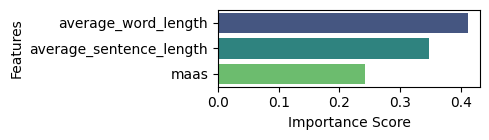

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = [0.410842, 0.347539, 0.241619]
feature_names = ['average_word_length', 'average_sentence_length', 'maas']

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 1.5))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

#plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### Random Forest

In [79]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [80]:
Dataset.head(3)

,Sentence,Label_num,Label,Length,Words,verb_count,adverb_count,noun_count,coordinate_count,subordinate_count,...,subordinate_percent,questions,questions_wh,PRP_first,PRP_second,PRP_third,PRP_first_percent,PRP_second_percent,PRP_third_percent,noun_phrase
0,"Take a student torn, for example, between purs...",0,Spoken,90,15,3,0,5,3,1,...,0.07,0,0,0,0,0,0.0,0.0,0.00,6
1,No politicalparty can long pursue advantage at...,0,Spoken,160,25,1,1,9,5,2,...,0.08,0,0,0,0,0,0.0,0.0,0.00,11
2,Any one who has borne the anxieties and burden...,0,Spoken,343,53,9,4,13,6,3,...,0.06,0,0,0,0,2,0.0,0.0,0.04,18


In [81]:
for column in Dataset.columns:
    print(column)

Sentence
Label_num
Label
Length
Words
verb_count
adverb_count
noun_count
coordinate_count
subordinate_count
parstree
pos
longest_path_parstree
depth_parstree
longest_word_length
verb_percent
adverb_percent
noun_percent
coordinate_percent
subordinate_percent
questions
questions_wh
PRP_first
PRP_second
PRP_third
PRP_first_percent
PRP_second_percent
PRP_third_percent
noun_phrase


In [82]:
Dataset['Label_num'].value_counts()

Label_num
0    13632
1    13632
Name: count, dtype: int64

In [83]:
# Split the data into features (X) and target (y)
X = Dataset[['Length', 'Words', 'verb_count', 'adverb_count', 'noun_count', 'coordinate_count', 'subordinate_count', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coordinate_percent', 'subordinate_percent', 'questions', 'questions_wh', 'PRP_first', 'PRP_second', 'PRP_third', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase']]
y = Dataset['Label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cea09cab130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cea09ceece0>})

In [85]:
y_pred = rand_search.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6137905739959655


In [87]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 348}


In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)


print("Improved Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Improved Accuracy: 0.6099394828534751
Confusion Matrix:
 [[1666 1061]
 [1066 1660]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      2727
           1       0.61      0.61      0.61      2726

    accuracy                           0.61      5453
   macro avg       0.61      0.61      0.61      5453
weighted avg       0.61      0.61      0.61      5453



<ipython-input-113-f241ed3069bc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")


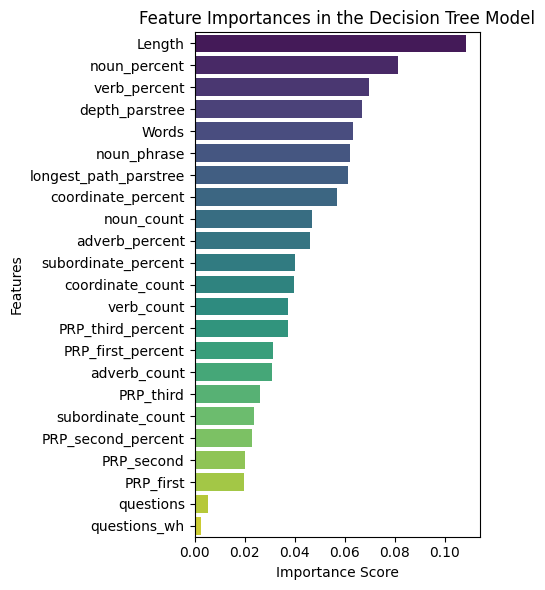

In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

best_rf = rand_search.best_estimator_
feature_importance = best_rf.feature_importances_
feature_names = ['Length', 'Words', 'verb_count', 'adverb_count', 'noun_count', 'coordinate_count', 'subordinate_count', 'longest_path_parstree', 'depth_parstree', 'verb_percent', 'adverb_percent', 'noun_percent', 'coordinate_percent', 'subordinate_percent', 'questions', 'questions_wh', 'PRP_first', 'PRP_second', 'PRP_third', 'PRP_first_percent', 'PRP_second_percent', 'PRP_third_percent', 'noun_phrase']  # Complete this list with all feature names

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=sorted_importances, palette="viridis")

plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### BERT

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [ ]:
# Spliting the Dataset to Train and Test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset['Sentence'],Dataset['Label_num'])

In [ ]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 64.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 97.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.2-py3-none-any.whl size=25317058 sha256=ced551166d54f1a0b71161210ad4d33b617fa16412f1985b636566cfab509ca1
  Stored in directory: /root/.cache/pip/wheels/35/7e/6e/0a327a2a8202d

In [ ]:
import ktrain
from ktrain import text

In [ ]:
(x_train, y_train), (x_test,y_test), preproc = text.texts_from_array(x_train=X_train.to_numpy(), y_train=y_train.to_numpy(),
                                                                     x_test= X_test.to_numpy(),  y_test= y_test.to_numpy(),
                                                                     class_names=['Spoken','Written'],
                                                                     preprocess_mode='bert',
                                                                     maxlen=150,
                                                                     max_features=35000)
#To solve the error add or remove: .to_numpy()

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 150


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [ ]:
learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
3408/3408 [==============================] - 742s 212ms/step - loss: 0.3359 - accuracy: 0.8602
Epoch 2/5
3408/3408 [==============================] - 730s 214ms/step - loss: 0.2182 - accuracy: 0.9123
Epoch 3/5
3408/3408 [==============================] - 729s 214ms/step - loss: 0.1227 - accuracy: 0.9554
Epoch 4/5
3408/3408 [==============================] - 730s 214ms/step - loss: 0.0382 - accuracy: 0.9867
Epoch 5/5
3408/3408 [==============================] - 729s 214ms/step - loss: 0.0065 - accuracy: 0.9981


In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=['Spoken','Written'])

213/213 [==============================] - 75s 338ms/step
              precision    recall  f1-score   support

      Spoken       0.90      0.90      0.90      3367
     Written       0.91      0.90      0.90      3449

    accuracy                           0.90      6816
   macro avg       0.90      0.90      0.90      6816
weighted avg       0.90      0.90      0.90      6816



array([[3045,  322],
       [ 341, 3108]])